# Primera aproximación a los datos del dataset Building 59


## Limpieza de datos

El dataset descargado tiene valores nulos y por tanto es necesario decidir qué técnicas se utilizan para imputar esos valores. El código de limpieza se encuentra [aquí](https://github.com/maaguado/time-series-building59/blob/main/data_cleaning.ipynb2).
A continuación haremos un estudio sobre cada variable de forma individual, incluyendo una comparación sobre los datos nulos y los datos que han sido imputados.

## Estudio de los distintos csv
Tenemos 5 subsistemas de captación de datos:
- Energy use data
- Outdoor environmental data
- Indoor environmental data
- HVAC operational data
- Occupant data

Empezaremos importando los dos primeros, pues ambos tienen un único fichero csv

In [2]:
# Basic imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


path = "../data_postprocess/"
path_bruto = "../data/"

## Energy use

El primer csv es el que contiene la información de uso de energía, y contiene 5 campos principales:
1. mels_S: carga eléctrica (misceláneo) del ala sur
2. mels_N: carga eléctrica (misceláneo) del ala norte
3. lig_S: carga de la luz del ala sur
4. hvac_S: carga de calefacción + aire acondicionado del ala sur
5. hvac_N: carga de calefacción + aire acondicionado del ala norte

In [3]:
# Importamos csv
energy_use = pd.read_csv(path+'ele_postprocess.csv')
energy_use.head()

,date,mels_S,lig_S,mels_N,hvac_N,hvac_S
0,2018-01-01 01:00:00,1.2,0.2,7.5,37.400002,19.500000
1,2018-01-01 01:15:00,1.3,0.2,6.8,37.500000,19.889999
2,2018-01-01 01:30:00,1.1,0.2,7.4,38.000000,19.299999
3,2018-01-01 01:45:00,1.2,0.2,7.7,37.200001,18.889999
4,2018-01-01 02:00:00,1.1,0.2,7.3,37.400002,24.700001


In [4]:
#We change the date column into datetime format
energy_use['date']= pd.to_datetime(energy_use['date'])


In [5]:
energy_use.head()

,date,mels_S,lig_S,mels_N,hvac_N,hvac_S
0,2018-01-01 01:00:00,1.2,0.2,7.5,37.400002,19.500000
1,2018-01-01 01:15:00,1.3,0.2,6.8,37.500000,19.889999
2,2018-01-01 01:30:00,1.1,0.2,7.4,38.000000,19.299999
3,2018-01-01 01:45:00,1.2,0.2,7.7,37.200001,18.889999
4,2018-01-01 02:00:00,1.1,0.2,7.3,37.400002,24.700001


### Visualización de datos

Text(0.5, 1.0, 'Energía HVAC utilizada en el ala norte y sur en el año 2018')

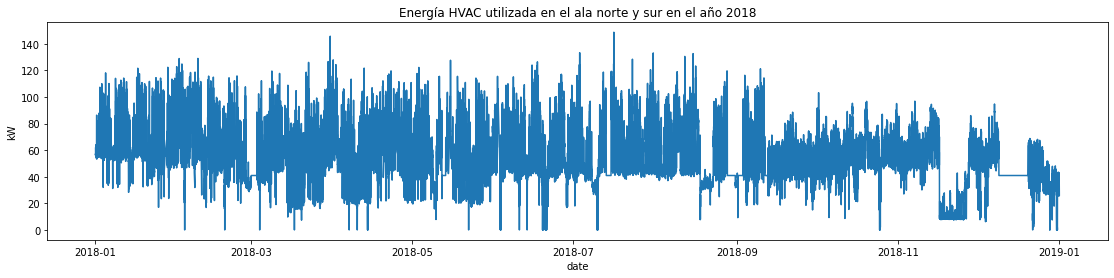

In [6]:
#Visualizamos la energía en aire condicionado (ala norte+sur) consumida en el año 2018:
energy_use_2018_total = energy_use[energy_use['date'].dt.year==2018]['hvac_S'] + energy_use[energy_use['date']<'2019']['hvac_N']
plt.figure(figsize=(19,4))
sns.lineplot(x =energy_use[energy_use['date'].dt.year==2018]['date'] , y=energy_use_2018_total)
plt.ylabel('kW')

plt.title('Energía HVAC utilizada en el ala norte y sur en el año 2018')

A continuación haremos un análisis de estas variables, empezando por la diferencia en el consumo total y de calefacción+aire acondicionado en un día entre el ala norte y el ala sur en distintos meses del año:

In [6]:
energy_use[energy_use['date'].dt.strftime('%Y-%m-%d') == '2018-01-01']

,date,mels_S,lig_S,mels_N,hvac_N,hvac_S
0,2018-01-01 01:00:00,1.2,0.2,7.5,37.400002,19.500000
1,2018-01-01 01:15:00,1.3,0.2,6.8,37.500000,19.889999
2,2018-01-01 01:30:00,1.1,0.2,7.4,38.000000,19.299999
3,2018-01-01 01:45:00,1.2,0.2,7.7,37.200001,18.889999
4,2018-01-01 02:00:00,1.1,0.2,7.3,37.400002,24.700001
...,...,...,...,...,...,...
87,2018-01-01 22:45:00,1.3,1.4,14.2,38.500000,21.299999
88,2018-01-01 23:00:00,1.4,1.4,14.2,38.200000,20.390000
89,2018-01-01 23:15:00,1.3,1.4,13.9,37.100000,18.500000
90,2018-01-01 23:30:00,1.2,1.4,13.6,39.400002,25.200001


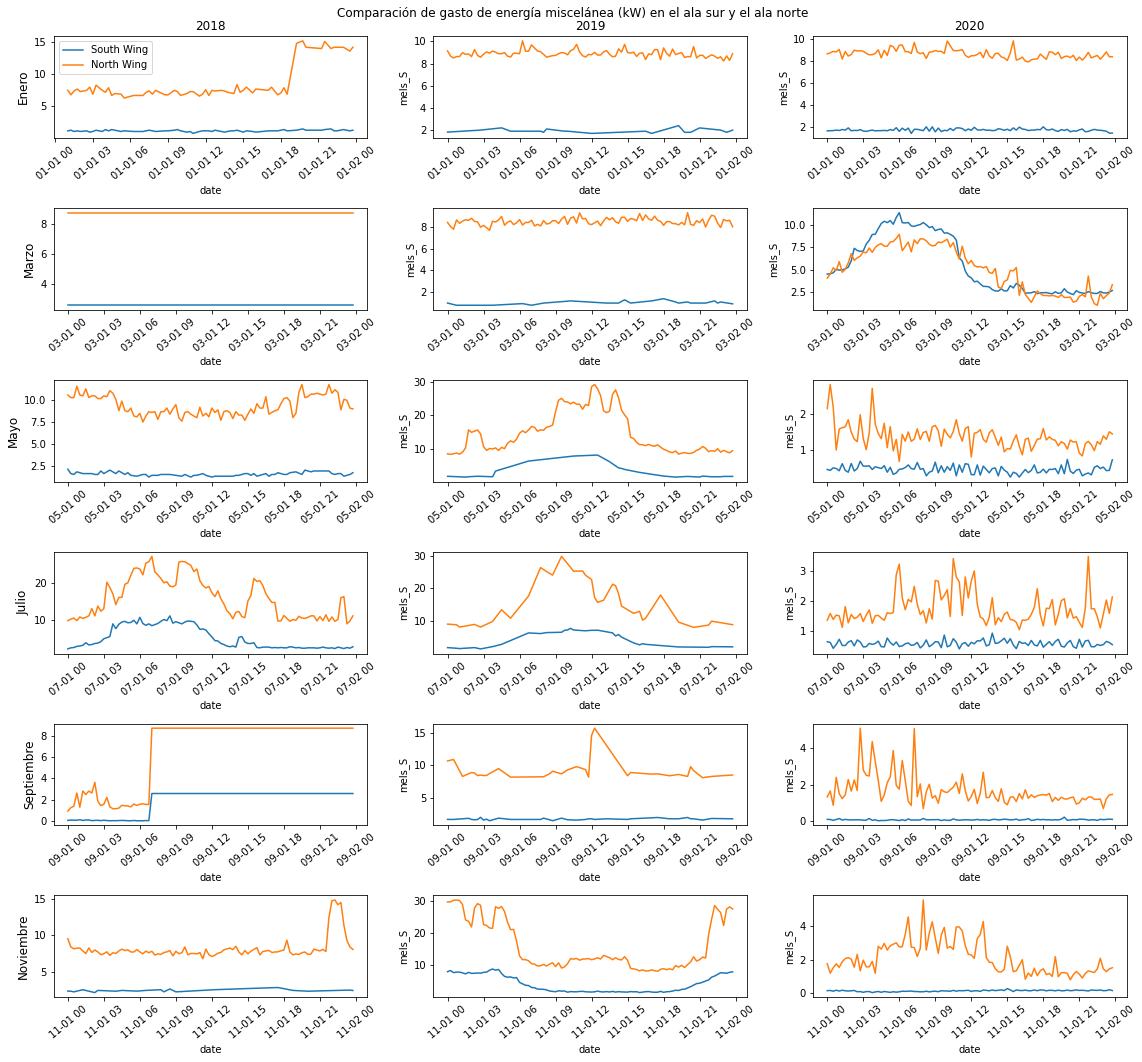

In [7]:
# Empezamos con el análisis de la diferencia del consumo en misceláneo

fig, axes = plt.subplots(nrows=6,ncols=3, figsize=(16,15) )
years = ['2018', '2019', '2020']
months = ['01', '03', '05', '07', '09', '11']
months2 = ['Enero', 'Marzo', 'Mayo', 'Julio', 'Septiembre', 'Noviembre']


for i in range(6):
    for j in range(3):
        actual_data = energy_use[energy_use['date'].dt.strftime('%Y-%m-%d') == years[j]+'-'+months[i]+'-01']
        sns.lineplot(ax=axes[i, j], data=actual_data, x='date', y='mels_S', label ='South Wing')
        sns.lineplot(ax=axes[i, j], data=actual_data, x='date', y='mels_N', label ='North Wing')
        axes[i, j].tick_params(axis='x', rotation=40)
        if i==0:
            axes[i, j].set_title(years[j],  size='large')
        if j ==0:
            axes[i, j].set_ylabel(months2[i], rotation=90, size='large')
        if i==0 and j==0: axes[i, j].legend(loc='upper left')
        else: axes[i, j].get_legend().remove()
            
fig.suptitle('Comparación de gasto de energía miscelánea (kW) en el ala sur y el ala norte')     
plt.tight_layout()
plt.show()
    

#### Observaciones

- Las tendencias de consumo de energía miscelánea tanto en el ala sur como en el ala norte por lo general se mantienen mes a mes en los años 2018 y 2019. 
- Podemos observar más falta de datos en 2019 (lo estudiaremos más a fondo a continuación)
- En el 2020 el gasto de energía en el ala sur se mantiene aparentemente más constante que el del ala norte, pero se rompen las tendencias anteriores.

In [8]:
#Defino una función para poder usar esta visualización con otras variables

def visualizacion_meses_anios(variables, leyenda, datos, titulo):
    fig, axes = plt.subplots(nrows=6,ncols=3, figsize=(16,15) )
    years = ['2018', '2019', '2020']
    months = ['01', '03', '05', '07', '09', '11']
    months2 = ['Enero', 'Marzo', 'Mayo', 'Julio', 'Septiembre', 'Noviembre']


    for i in range(6):
        for j in range(3):
            actual_data = datos[datos['date'].dt.strftime('%Y-%m-%d') == years[j]+'-'+months[i]+'-01']
            for m in range(len(variables)):
                sns.lineplot(ax=axes[i, j], data=actual_data, x='date', y=variables[m], label =leyenda[m])
            axes[i, j].tick_params(axis='x', rotation=40)
            if i==0:
                axes[i, j].set_title(years[j],  size='large')
            if j ==0:
                axes[i, j].set_ylabel(months2[i], rotation=90, size='large')
            if i==0 and j==0: axes[i, j].legend(loc='upper left')
            else: axes[i, j].get_legend().remove()

    fig.suptitle(titulo)     
    plt.tight_layout()
    plt.show()

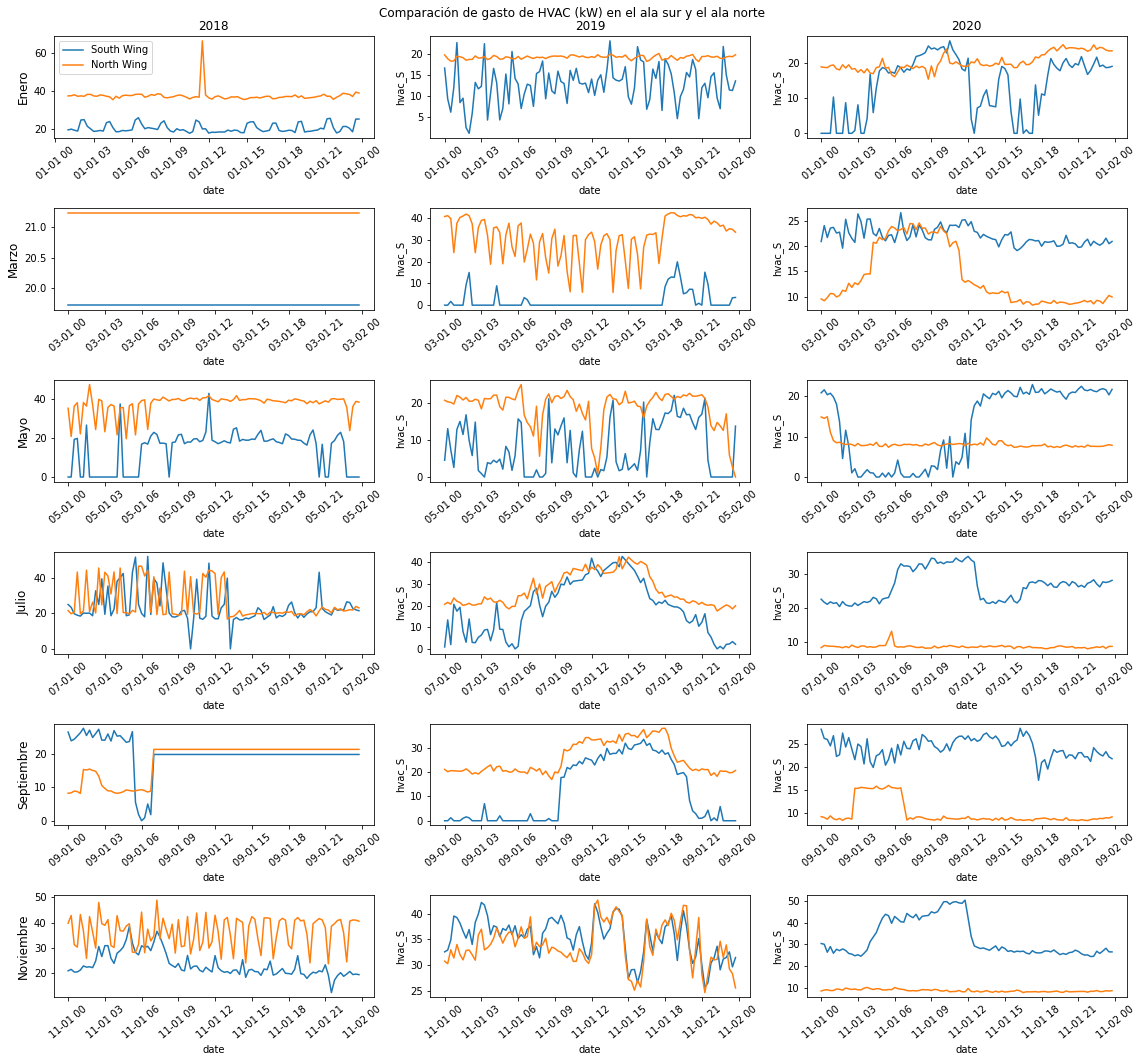

In [9]:
visualizacion_meses_anios(variables=['hvac_S','hvac_N'], leyenda=['South Wing', 'North Wing'], datos=energy_use, titulo='Comparación de gasto de HVAC (kW) en el ala sur y el ala norte')

#### Observaciones

- Por lo general no se mantienen las tendencias mes a mes en ninguno de los tres años. Hay alguna excepción, como por ejemplo en Septiembre, podemos ver una forma parecida en el gasto del ala sur (con una bajada bastante drástica entorno al día 9).
- En el año 2020, el gasto en HVAC del ala norte es mucho más bajo que el del ala sur, mientras que el gasto de energía miscelánea era más alto.

Por último, visualizaremos el consumo en aire acondicionado por mes, diferenciando entre el ala norte y el ala sur:



In [10]:
total_meses = energy_use.groupby(energy_use.date.dt.to_period("M")).sum().reset_index()

#Ejemplo de un año
total_meses[total_meses['date'].dt.year==2019]

,date,mels_S,lig_S,mels_N,hvac_N,hvac_S
12,2019-01,7722.304547,3741.784801,31093.359096,68664.517483,32684.860893
13,2019-02,8256.701999,6777.515961,33113.367330,78113.311651,21996.095368
14,2019-03,9761.713333,6086.776710,37600.834580,33859.877837,35567.780631
15,2019-04,9792.652083,6081.014357,35529.477571,48694.307280,24531.685986
16,2019-05,8818.371667,5797.076108,37266.725637,58100.656384,32858.168991
17,2019-06,9931.282500,5689.298810,34864.789393,39650.001240,11051.053401
18,2019-07,11002.903745,6354.474452,37602.007191,68535.444510,45592.282565
19,2019-08,10462.269678,5589.332644,36558.199953,63754.591623,35866.396905
20,2019-09,9893.631714,5793.891571,35682.585750,81841.216497,58992.552199
21,2019-10,7189.299345,3884.270944,27652.849485,67969.578982,68511.487482


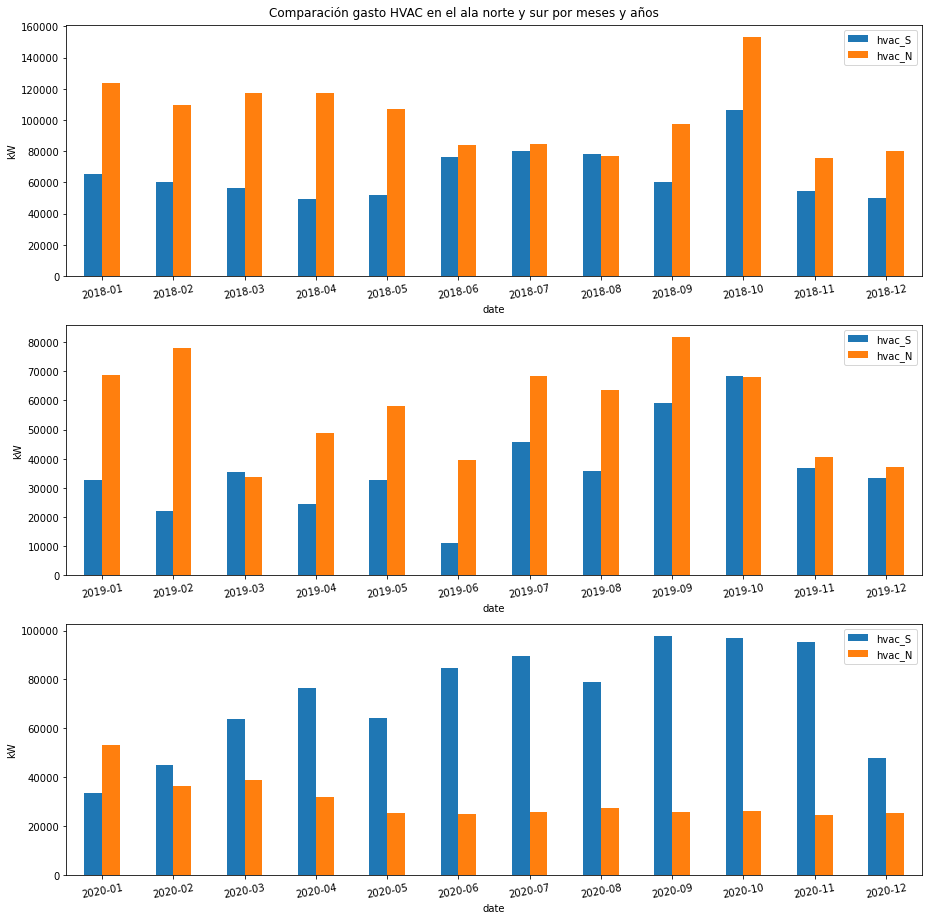

In [11]:


fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(13,13) )
years = [2018, 2019, 2020]
for i in range(len(years)):
    total_meses[total_meses['date'].dt.year==years[i]].set_index('date')[['hvac_S', 'hvac_N']].plot(kind='bar', ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=10)
    axes[i].set_ylabel("kW")

plt.suptitle('Comparación gasto HVAC en el ala norte y sur por meses y años')
plt.tight_layout()


### Calidad de los datos

Para comprobar la calidad de los datos comprobaremos:
1. Cuántas marcas de tiempo tienen alguna de las 5 variables como nula 
2. Cuál es la diferencia media entre tomas (lo ideal es que sean 15 minutos justos)






In [12]:
energy_use

,date,mels_S,lig_S,mels_N,hvac_N,hvac_S
0,2018-01-01 01:00:00,1.2,0.20,7.500000,37.400002,19.500000
1,2018-01-01 01:15:00,1.3,0.20,6.800000,37.500000,19.889999
2,2018-01-01 01:30:00,1.1,0.20,7.400000,38.000000,19.299999
3,2018-01-01 01:45:00,1.2,0.20,7.700000,37.200001,18.889999
4,2018-01-01 02:00:00,1.1,0.20,7.300000,37.400002,24.700001
...,...,...,...,...,...,...
106733,2020-12-31 23:00:00,0.0,0.00,1.004055,8.072727,24.620000
106734,2020-12-31 23:15:00,0.0,0.00,1.256659,7.786250,25.700000
106735,2020-12-31 23:30:00,0.0,0.00,1.005779,8.136364,25.880000
106736,2020-12-31 23:45:00,0.0,0.05,1.313974,8.629000,25.385714


In [13]:
# Comprobamos si hay datos nulos

energy_use[energy_use.isna().any(axis=1)]

,date,mels_S,lig_S,mels_N,hvac_N,hvac_S


In [14]:
#Comprobamos la diferencia media entre las tomas de datos
a = energy_use.apply(lambda x: x.diff())
a['date'].mean()

Timedelta('0 days 00:14:47.141291211')

In [15]:
a['date']

0                    NaT
1        0 days 00:15:00
2        0 days 00:15:00
3        0 days 00:15:00
4        0 days 00:15:00
               ...      
106733   0 days 00:15:00
106734   0 days 00:15:00
106735   0 days 00:15:00
106736   0 days 00:15:00
106737   0 days 00:15:00
Name: date, Length: 106738, dtype: timedelta64[ns]

In [16]:
#Vemos dónde estan esos huecos en la toma de datos
energy_use[a['date']<'00:15:00']

,date,mels_S,lig_S,mels_N,hvac_N,hvac_S
26233,2018-10-01 07:10:00,3.825000,3.418,9.460000,40.018125,35.811250
26234,2018-10-01 07:15:00,3.475000,3.136,9.420000,42.599412,36.115294
26235,2018-10-01 07:20:00,3.180000,2.854,9.380000,40.292500,36.903750
26236,2018-10-01 07:30:00,3.425000,2.572,9.340000,38.987059,30.316111
26237,2018-10-01 07:40:00,3.366667,2.290,9.300000,37.460000,27.576923
...,...,...,...,...,...,...
29289,2018-10-17 06:30:00,3.277778,3.875,9.048333,26.350000,22.042857
29290,2018-10-17 06:40:00,3.433333,3.900,8.922500,24.188889,21.833333
29291,2018-10-17 06:45:00,3.588889,3.958,9.050000,36.715556,22.494444
29292,2018-10-17 06:50:00,3.744444,4.045,9.196667,41.766667,23.308333


### Comparación con datos en bruto

In [17]:
def summary2(dataframe):
    for i in range(dataframe.shape[1]):
        print(dataframe.columns[i])
        n_miss = dataframe.iloc[:,i].isnull().sum()
        perc = n_miss / dataframe.shape[0] * 100
        print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
    
    a = dataframe.apply(lambda x: x.diff())
    
    print("Diferencia media entre toma de datos: " ,a['date'].mean() )
    
    

In [18]:
energy_use_bruto = pd.read_csv(path_bruto+'ele.csv')
#We change the date column into datetime format
energy_use_bruto['date']= pd.to_datetime(energy_use_bruto['date'])


In [19]:
summary2(energy_use_bruto)

date
> 0, Missing: 0 (0.0%)
mels_S
> 1, Missing: 38 (0.0%)
lig_S
> 2, Missing: 34 (0.0%)
mels_N
> 3, Missing: 24 (0.0%)
hvac_N
> 4, Missing: 1542 (1.5%)
hvac_S
> 5, Missing: 1542 (1.5%)
Diferencia media entre toma de datos:  0 days 00:15:18.908847419


In [20]:
# Comparando con los datos completados
summary2(energy_use)

date
> 0, Missing: 0 (0.0%)
mels_S
> 1, Missing: 0 (0.0%)
lig_S
> 2, Missing: 0 (0.0%)
mels_N
> 3, Missing: 0 (0.0%)
hvac_N
> 4, Missing: 0 (0.0%)
hvac_S
> 5, Missing: 0 (0.0%)
Diferencia media entre toma de datos:  0 days 00:14:47.141291211


La diferencia media entre tomas (en los datos brutos) es de 15 minutos y 18 segundos, esto quiere decir que la frecuencia de 15 minutos no es constante a lo largo de los tres años. Vamos a comprobar cuántas filas hay donde la toma anterior esté muy lejos (temporalmente hablando), "jugando" con el valor del umbral:

In [21]:
umbral = '24:00:00'
a = energy_use_bruto.apply(lambda x: x.diff())
energy_use_bruto[a['date']>umbral]

,date,mels_S,lig_S,mels_N,hvac_N,hvac_S
5458,2018-03-01 00:00:00,5.700000,5.300000,22.000000,45.500000,43.200000
12057,2018-05-10 03:00:00,NaN,NaN,NaN,27.800000,20.100000
17716,2018-07-09 22:00:00,NaN,4.590000,NaN,NaN,NaN
21468,2018-08-22 22:15:00,NaN,4.200000,15.300000,45.900000,24.600000
22271,2018-09-01 07:00:00,1.500000,0.100000,7.150000,24.276316,15.665263
31120,2018-11-27 19:00:00,NaN,4.840000,20.198000,42.285714,13.050000
34755,2019-01-07 19:00:00,NaN,5.433333,25.900000,24.290000,20.375000
53486,2019-07-22 22:00:00,NaN,NaN,NaN,36.241250,37.625000
53494,2019-07-24 01:00:00,NaN,NaN,NaN,39.070714,33.092667
60306,2019-10-09 05:45:00,0.700000,NaN,7.800000,0.000000,0.000000


In [22]:
#Cuánta diferencia hay:
a['date'].sort_values(ascending=False).head(14)

31120   11 days 04:45:00
60306    6 days 06:00:00
21468    4 days 22:30:00
34755    3 days 03:30:00
5458     2 days 02:45:00
61896    1 days 22:45:00
17716    1 days 20:30:00
60409    1 days 10:15:00
12057    1 days 09:30:00
65698    1 days 04:45:00
53494    1 days 01:15:00
53486    1 days 00:30:00
22271    1 days 00:15:00
68827    0 days 00:15:00
Name: date, dtype: timedelta64[ns]

In [23]:
energy_use.loc[[31119, 31120]] 

,date,mels_S,lig_S,mels_N,hvac_N,hvac_S
31119,2018-11-05 07:30:00,5.228571,3.725,10.9,34.698571,32.105714
31120,2018-11-05 07:45:00,5.100000,3.775,9.8,46.361538,29.300000


In [24]:
energy_use_bruto.loc[[31119, 31120]]#En el 2018 hubo un fallo de 11 días

,date,mels_S,lig_S,mels_N,hvac_N,hvac_S
31119,2018-11-16 14:15:00,NaN,1.00,8.495,39.025000,26.2375
31120,2018-11-27 19:00:00,NaN,4.84,20.198,42.285714,13.0500


Ya hemos visto que se introducen las filas que faltan (dentro del rango de fechas disponibles) para mantener la frecuencia. 

Text(0.5, 0.98, 'Energía HVAC utilizada en el ala norte y sur ')

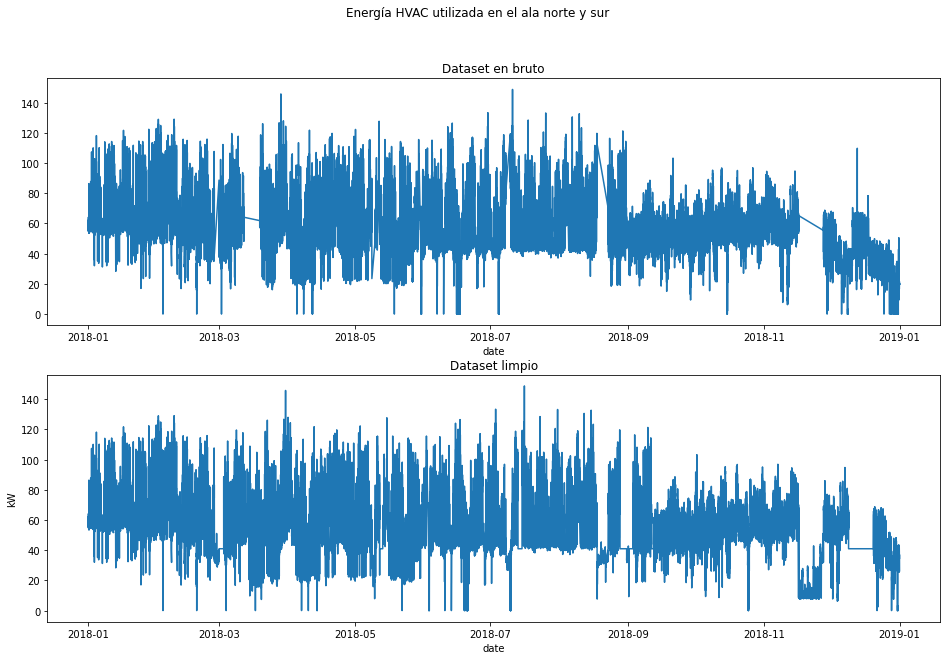

In [25]:
#Visualizamos la energía en aire condicionado (ala norte+sur) consumida en el año 2018:
energy_use_2018_total_bruto = energy_use_bruto[energy_use_bruto['date'].dt.year==2018]['hvac_S'] + energy_use_bruto[energy_use_bruto['date']<'2019']['hvac_N']
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(16,10) )


sns.lineplot(x =energy_use[energy_use['date'].dt.year==2018]['date'] , y=energy_use_2018_total, ax = axes[1])
sns.lineplot(x =energy_use_bruto[energy_use_bruto['date'].dt.year==2018]['date'] , y=energy_use_2018_total_bruto, ax = axes[0])
axes[1].set_title("Dataset limpio")
axes[0].set_title("Dataset en bruto")

plt.ylabel('kW')

plt.suptitle('Energía HVAC utilizada en el ala norte y sur ')

Podemos visualizar los campos vacíos con la librería *missingno*, que nos permite realizar plots como los que vemos a continuación:

In [26]:
import missingno as msno

<AxesSubplot:>

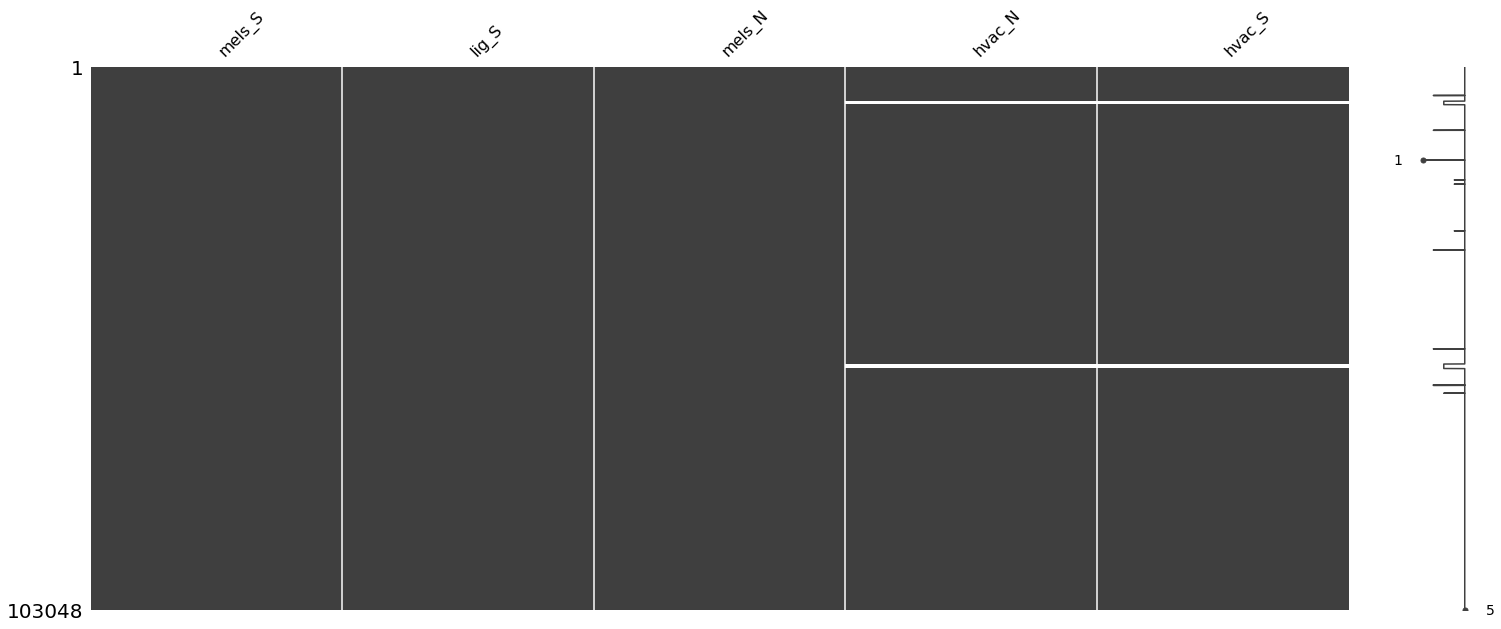

In [27]:
missingdata_df = energy_use_bruto.columns[energy_use_bruto.isnull().any()].tolist()
msno.matrix(energy_use_bruto[missingdata_df])

/Users/maguado/opt/anaconda3/lib/python3.9/site-packages/missingno/missingno.py:271: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<AxesSubplot:>

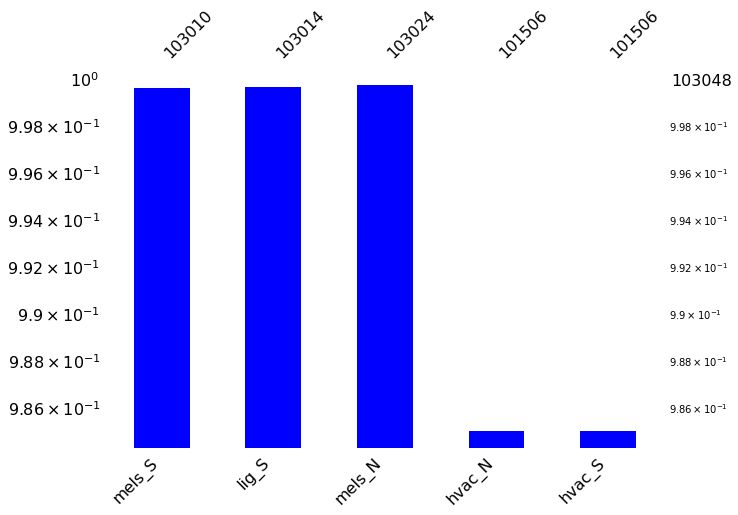

In [28]:
msno.bar(energy_use_bruto[missingdata_df], color="blue", log=True, figsize=(10,7))

<AxesSubplot:>

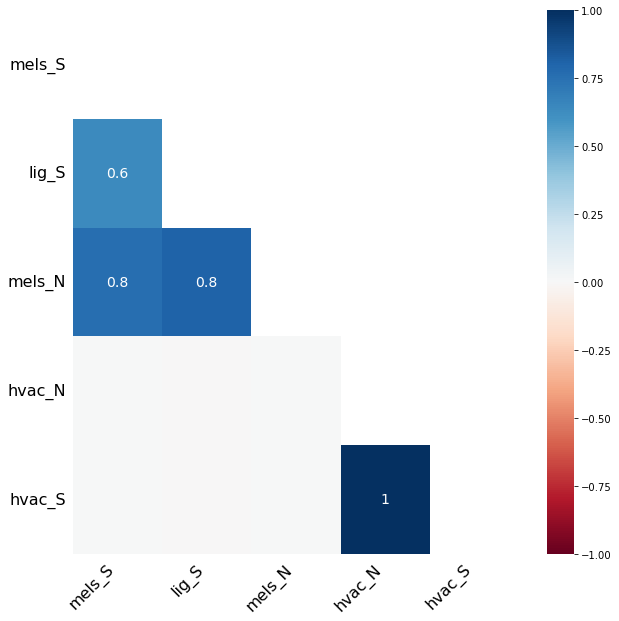

In [29]:
#El heatmap representa la relación entre la nulidad de las distintas variables
msno.heatmap(energy_use_bruto[missingdata_df], figsize=(10,10))

### Propiedades de time series
A continuación iremos estudiando para cada una de las variables presentes en este bloque, las propiedades clásicas de una serie temporal:
1. Descomposición (aditiva o multiplicativa)
2. Estudio de estacionariedad

#### Descomposición

In [32]:
energy_use= energy_use.set_index('date')


In [33]:
energy_use= energy_use.clip(lower=0.01)

In [34]:
energy_use.describe()

,mels_S,lig_S,mels_N,hvac_N,hvac_S
count,106738.000000,106738.000000,106738.000000,106738.000000,106738.000000
mean,2.573521,1.459995,8.747003,21.338067,19.670675
std,2.523380,1.828130,6.327680,14.278117,12.609425
min,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.700000,0.100000,2.704188,8.512500,11.383822
50%,1.900000,0.200000,8.600000,20.949410,20.600000
75%,2.887500,3.250000,10.660000,31.416961,26.400000
max,14.580000,10.712500,35.976000,84.500000,79.800000


In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

def mostrar_descomp(df, variable, period):
    # Multiplicative Decomposition 
    multiplicative_decomposition = seasonal_decompose(df[variable], model='multiplicative', period = period)

    # Additive Decomposition
    additive_decomposition = seasonal_decompose(df[variable], model='additive', period = period)

    # Plot
    plt.rcParams.update({'figure.figsize': (10,8)})
    multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()

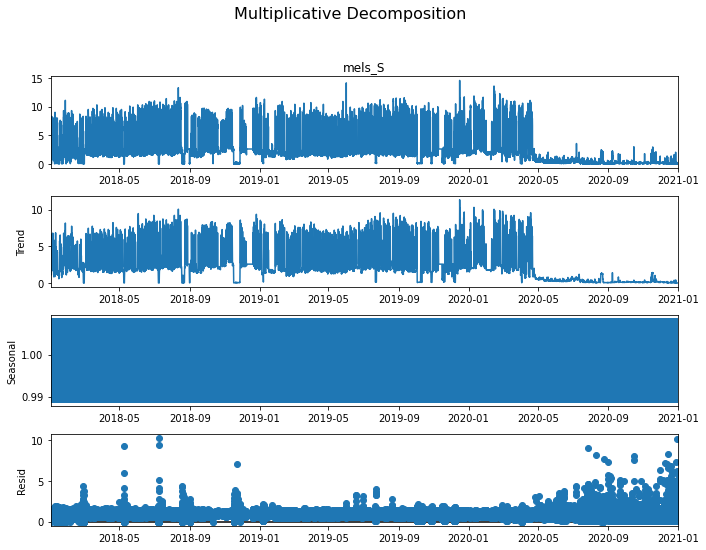

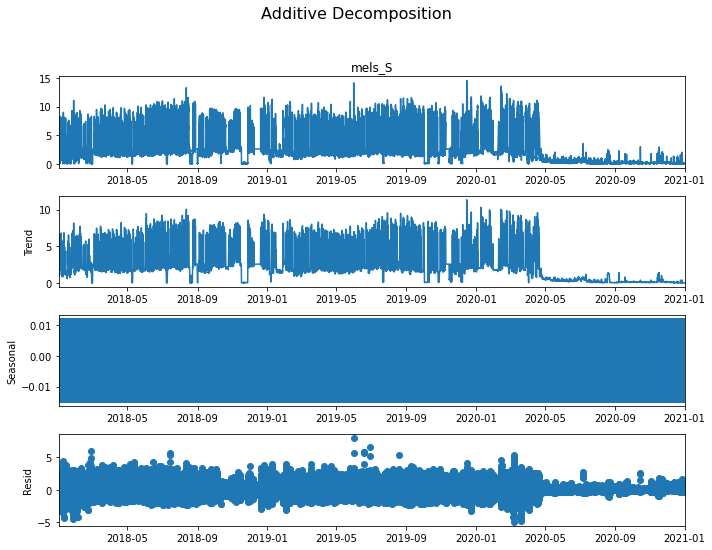

In [54]:
mostrar_descomp(energy_use, 'mels_S', 36)

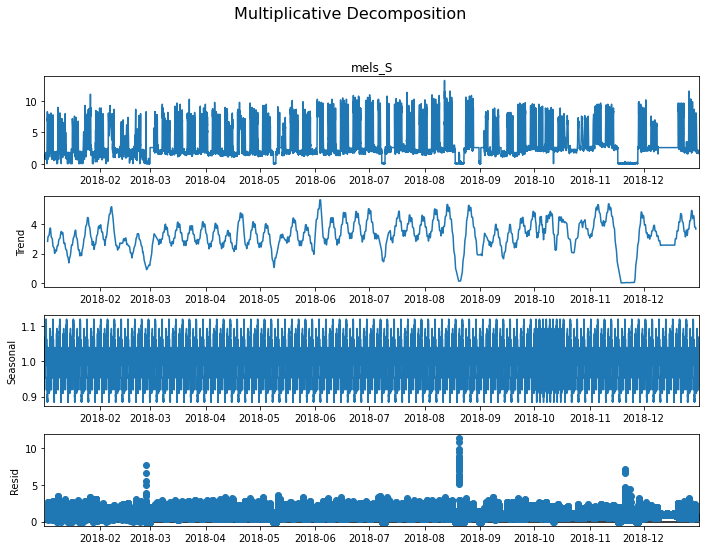

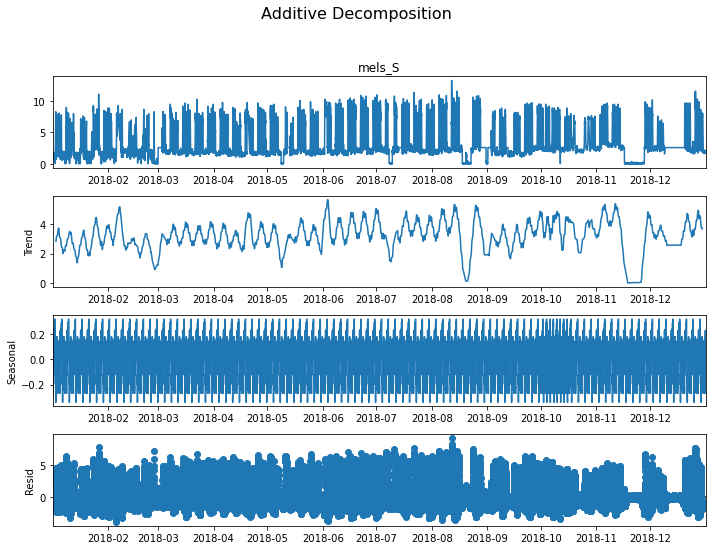

In [55]:
#Vamos a separarlo por años

energy_use_2018 = energy_use[energy_use.index.year==2018]

mostrar_descomp(energy_use_2018, 'mels_S', 365)

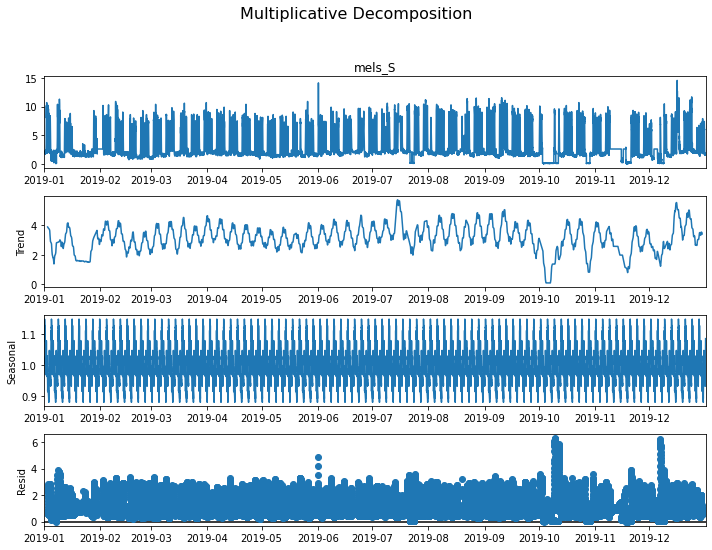

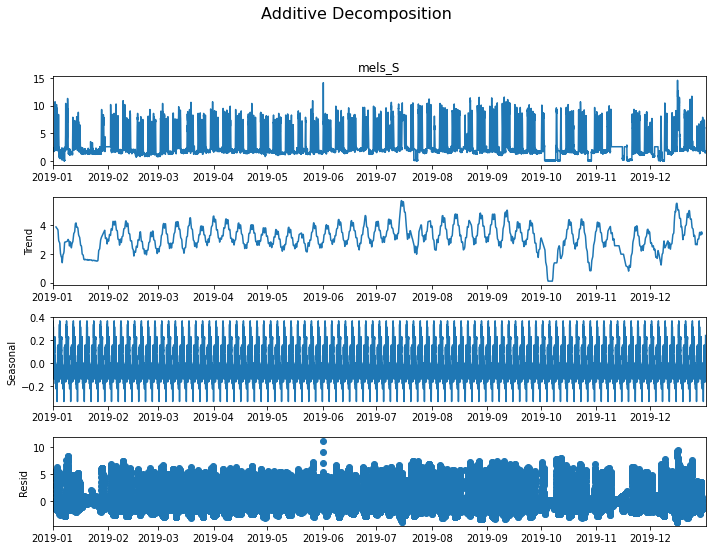

In [56]:
#Vamos a separarlo por años

energy_use_2018 = energy_use[energy_use.index.year==2019]

mostrar_descomp(energy_use_2018, 'mels_S', 365)

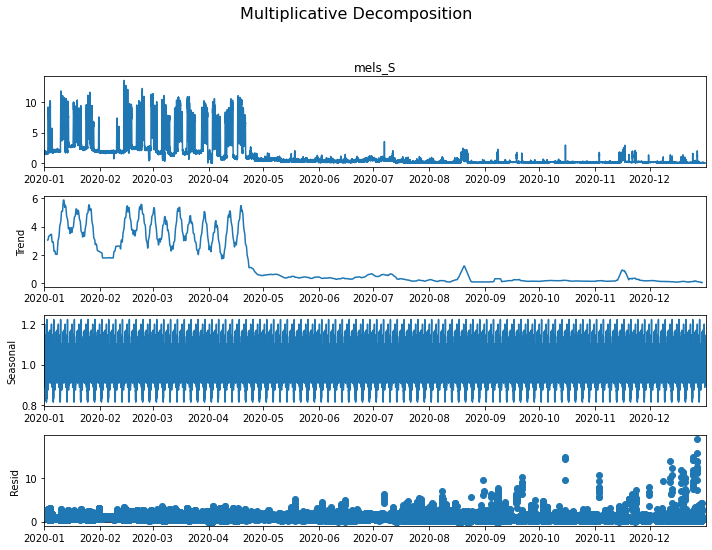

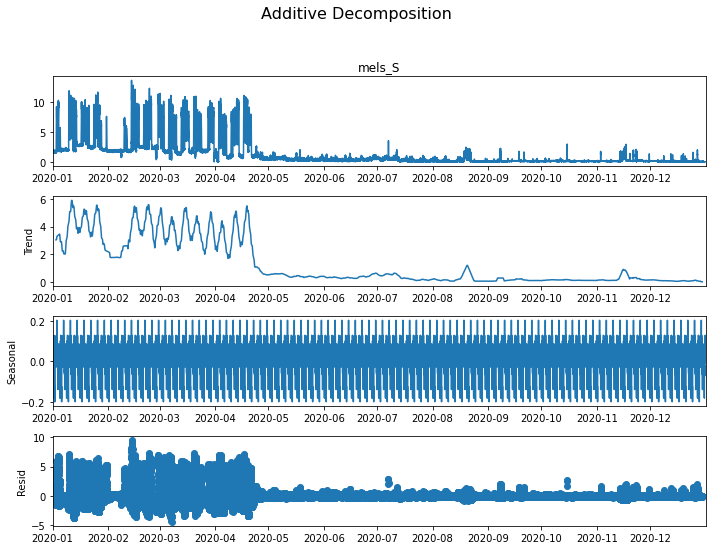

In [57]:
#Vamos a separarlo por años

energy_use_2018 = energy_use[energy_use.index.year==2020]

mostrar_descomp(energy_use_2018, 'mels_S', 365)

## Outdoor site weather

Disponemos de 5 variables que contienen información sobre el tiempo en el exterior del edificio, que son:
1. air_temp_set_1: temperatura del aire exterior (sensor 1)
2. air_temp_set_2: temperatura del aire exterior (sensor 2)
3. dew_point_temperature: es la temperatura más alta a la que empieza a condensarse el vapor de agua contenido en el aire (Wikipedia), si alcanza la temperatura exterior significa que empezará a formarse niebla o lluvia de algún tipo. (sensor 2)
4. relative_ humidity_set_1: humedad relativa (sensor 1)
5. solar_radiation_ set_1: radiación solar (sensor 1)


In [20]:
#Importamos el csv 
outdoor_w = pd.read_csv(path+'site_weather.csv')
outdoor_w.head()

,date,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1
0,2018-01-01 00:00:00,11.64,11.51,8.10,79.07,86.70
1,2018-01-01 00:15:00,11.49,11.42,8.14,80.10,45.88
2,2018-01-01 00:30:00,11.59,11.51,8.21,79.92,51.62
3,2018-01-01 00:45:00,11.44,11.41,8.11,80.20,21.43
4,2018-01-01 01:00:00,11.12,11.15,8.04,81.50,6.45


In [21]:
#Same process as before

#We change the date column into datetime format
outdoor_w['date']= pd.to_datetime(outdoor_w['date'])


### Visualización 

Utilizaremos la función definida con anterioridad para comparar en 6 de los meses del año, durante los tres años, la temperatura según el sensor 1 y el sensor 2.
También compararemos el cambio en el resto de variables a lo largo de los tres años.

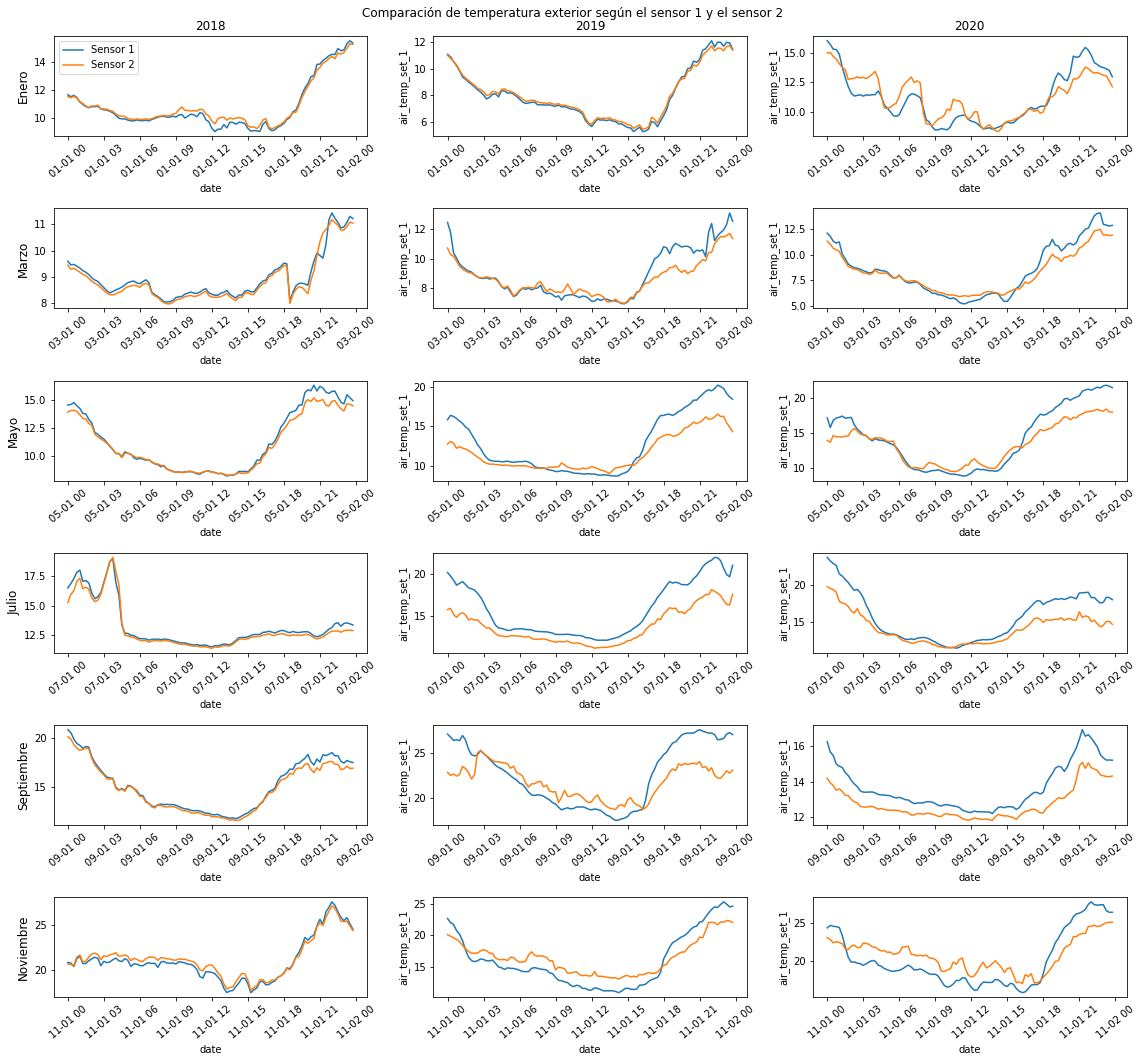

In [22]:
visualizacion_meses_anios(variables=['air_temp_set_1','air_temp_set_2'], leyenda=['Sensor 1', 'Sensor 2'], datos=outdoor_w, titulo='Comparación de temperatura exterior según el sensor 1 y el sensor 2')

#En temperaturas altas el sensor 1 tiende a detectar una temperatura superior al 2

In [23]:
#Variables que queremos observar
variables_o = ['dew_point_temperature_set_1d','relative_humidity_set_1','solar_radiation_set_1']

In [24]:
def visualizar_variables_mismo_anio(variables, labels, data, anio, titulo):
    fig, axes = plt.subplots(nrows=len(variables),ncols=1, figsize=(16,12) )
    datos_anio = data[data['date'].dt.year == anio]
    for i in range(len(variables)):
        sns.lineplot(x ='date', y=variables[i],data =datos_anio , palette='rocket', ax=axes[i])
    fig.suptitle(titulo)     
    plt.tight_layout()
    plt.show()
    



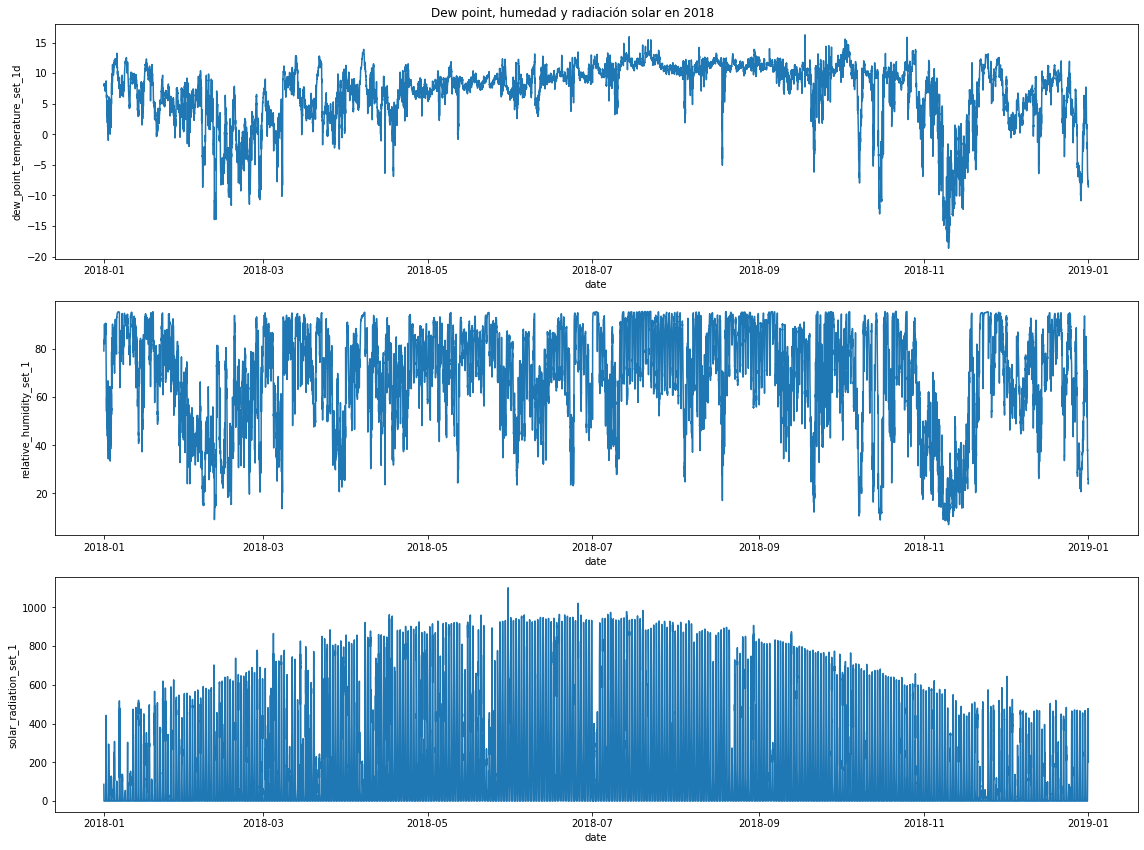

In [25]:
visualizar_variables_mismo_anio(variables=variables_o, labels=['Dew point','Humedad','Radiación solar'], data=outdoor_w, anio=2018, titulo='Dew point, humedad y radiación solar en 2018' )




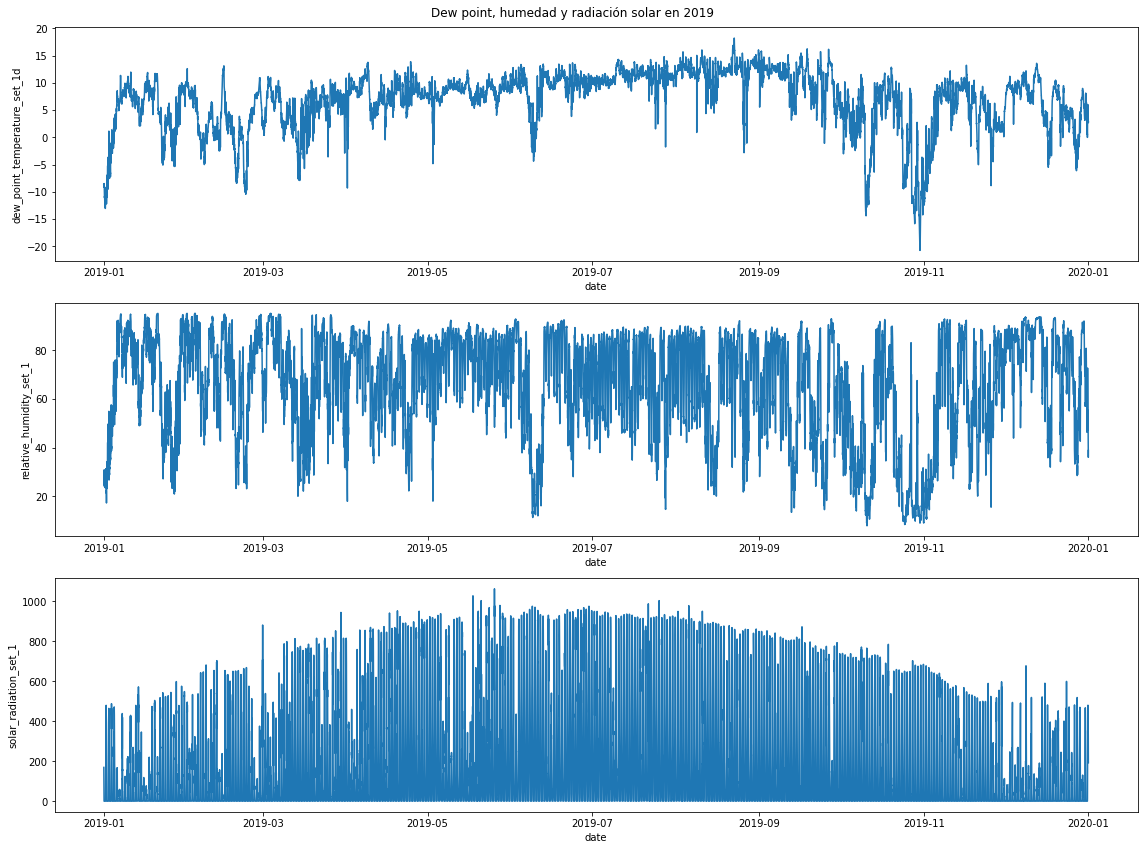

In [26]:
visualizar_variables_mismo_anio(variables=variables_o, labels=['Dew point','Humedad','Radiación solar'], data=outdoor_w, anio=2019, titulo='Dew point, humedad y radiación solar en 2019' )



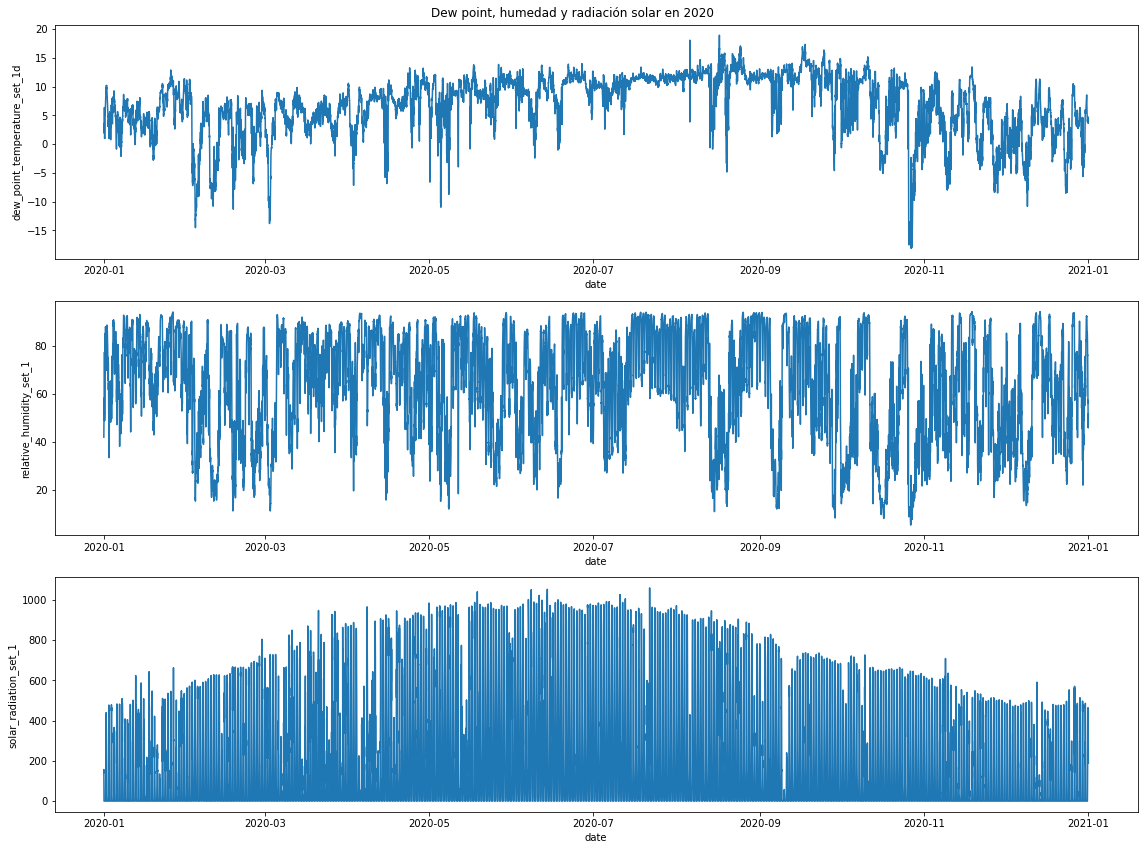

In [27]:
visualizar_variables_mismo_anio(variables=variables_o, labels=['Dew point','Humedad','Radiación solar'], data=outdoor_w, anio=2020, titulo='Dew point, humedad y radiación solar en 2020' )



### Calidad de los datos

In [28]:
#First, we look for null values

outdoor_w[outdoor_w.isna().any(axis=1)]

,date,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1


In [29]:
#We want to know the period of sample taking, it looks like 15 minutes, but we are checking it to make sure

b = outdoor_w.apply(lambda x: x.diff())['date']
outdoor_w[b>'00:15:00']



,date,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1


## Occupant data

Por último en esta primera aproximación incluiremos los datos de ocupación del edificio, dejaremos el resto de variables a un lado por el momento pues son bastante más técnicas y difíciles de entender.
Tenemos dos ficheros en este bloque de información:
1. Cuenta de ocupación:
    - occ_third_south: cuenta de personas en la zona sur de la tercera planta
    - occ_fourth_south: cuenta de personas en la zona sur de la cuarta planta
2. Datos de conexión wifi:
    - wifi_first_south: cuenta de conexiones wifi en la zona sur de la primera planta
    - wifi_second_ south: cuenta de conexiones wifi en la zona sur de la segunda planta
    - wifi_third_south: cuenta de conexiones wifi en la zona sur de la tercera planta
    - wifi_fourth_ south: cuenta de conexiones wifi en la zona sur de la cuarta planta
    
Aparentemente la frecuencia en ambos ficheros csv es la misma, por lo que vamos a fusionar primero los datos, y comprobar si hay algún hueco.

### Datos de ocupación

In [30]:
#Importamos el csv 
occ = pd.read_csv(path+'occ.csv')
occ.head()




,date,occ_third_south,occ_fourth_south
0,2018-05-22 07:00:00,0.0,0.0
1,2018-05-22 07:01:00,0.0,1.0
2,2018-05-22 07:02:00,0.0,0.0
3,2018-05-22 07:03:00,0.0,1.0
4,2018-05-22 07:04:00,0.0,0.0


In [31]:
occ['date']= pd.to_datetime(occ['date'])



In [32]:
#Comprobamos si la frecuencia media es un minuto, es decir, que no faltan datos en medio del dataframe

occ[occ.isna().any(axis=1)]


,date,occ_third_south,occ_fourth_south


In [33]:

c = occ.apply(lambda x: x.diff())['date']
occ[c>'00:01:00']

,date,occ_third_south,occ_fourth_south


In [ ]:
occ

### Datos wifi

In [34]:
#Importamos el csv 
wifi = pd.read_csv(path+'wifi.csv')
wifi.head(10) # Las dos primeras variables son nulas hasta más allá de las 7am, plantear eliminar las 7 primeras horas

,date,wifi_first_south,wifi_second_south,wifi_third_south,wifi_fourth_south
0,2018/5/22 00:00,NaN,NaN,38.0,26.0
1,2018/5/22 00:10,NaN,NaN,37.0,26.0
2,2018/5/22 00:20,NaN,NaN,37.0,28.0
3,2018/5/22 00:30,NaN,NaN,36.0,27.0
4,2018/5/22 00:40,NaN,NaN,36.0,28.0
5,2018/5/22 00:50,NaN,NaN,36.0,28.0
6,2018/5/22 01:00,NaN,NaN,36.0,26.0
7,2018/5/22 01:10,NaN,NaN,36.0,26.0
8,2018/5/22 01:20,NaN,NaN,37.0,26.0
9,2018/5/22 01:30,NaN,NaN,36.0,26.0


In [35]:
#Eliminamos las primeras 7 horas de datos
wifi.drop(index=wifi.index[:42], axis=0, inplace=True)

In [36]:
wifi['date']= pd.to_datetime(wifi['date'])



Realizamos las mismas comprobaciones sobre la calidad de los datos pre-fusión

In [37]:

wifi[wifi.isna().any(axis=1)]


,date,wifi_first_south,wifi_second_south,wifi_third_south,wifi_fourth_south
42,2018-05-22 07:00:00,NaN,NaN,52.0,24.0
43,2018-05-22 07:10:00,NaN,NaN,50.0,24.0
44,2018-05-22 07:20:00,NaN,NaN,50.0,22.0
45,2018-05-22 07:30:00,NaN,NaN,51.0,24.0
46,2018-05-22 07:40:00,NaN,NaN,52.0,26.0
...,...,...,...,...,...
7339,2018-07-11 23:10:00,NaN,NaN,35.0,30.0
7340,2018-07-11 23:20:00,NaN,NaN,35.0,30.0
7341,2018-07-11 23:30:00,NaN,NaN,34.0,30.0
7342,2018-07-11 23:40:00,NaN,NaN,34.0,30.0


Los datos de la primera y la segunda planta solo están disponibles en la segunda franja horaria, lo comprobamos a continuación:

In [38]:
#Comprobamos que en los dos primeros meses de toma de datos,  no estaban disponibles la cuenta de la primera y la segunda planta

wifi[(wifi['date']>='2018-05-22 07:00:00')&(wifi['date']<='2018-07-11 23:50:00')]['wifi_first_south'].value_counts()

Series([], Name: wifi_first_south, dtype: int64)

In [39]:
wifi[(wifi['date']>='2018-05-22 07:00:00')&(wifi['date']<='2018-07-11 23:50:00')]['wifi_second_south'].value_counts()

Series([], Name: wifi_second_south, dtype: int64)

In [40]:
wifi[(wifi['wifi_first_south'].isna())&(~wifi['wifi_second_south'].isna())]

,date,wifi_first_south,wifi_second_south,wifi_third_south,wifi_fourth_south


In [41]:
#Añadimos una columna: marcador de disponibilidad de datos en las dos primeras columnas

wifi['first_second_available']=wifi['wifi_first_south'].isna().astype(int)

In [42]:
#Rellenamos con 0
wifi['wifi_first_south']=wifi['wifi_first_south'].fillna(0.0)
wifi['wifi_second_south']=wifi['wifi_second_south'].fillna(0.0)

Comprobamos también la frecuencia media:

In [43]:


d = wifi.apply(lambda x: x.diff())['date']
wifi[d>'00:10:00']

,date,wifi_first_south,wifi_second_south,wifi_third_south,wifi_fourth_south,first_second_available
7344,2020-02-10 16:25:00,2.0,19.0,127.0,118.0,0


In [44]:
#Hay un timestamp donde la frecuencia falla (es el inicio de la segunda toma de datos)

wifi.loc[[7344, 7343]]

,date,wifi_first_south,wifi_second_south,wifi_third_south,wifi_fourth_south,first_second_available
7344,2020-02-10 16:25:00,2.0,19.0,127.0,118.0,0
7343,2018-07-11 23:50:00,0.0,0.0,34.0,31.0,1


### Fusión de datos de ocupación

In [45]:
occupation = occ.merge(wifi, how='outer', left_on = 'date', right_on ='date')
occupation = occupation.sort_values(by='date')
occupation.head()

,date,occ_third_south,occ_fourth_south,wifi_first_south,wifi_second_south,wifi_third_south,wifi_fourth_south,first_second_available
0,2018-05-22 07:00:00,0.0,0.0,0.0,0.0,52.0,24.0,1.0
1,2018-05-22 07:01:00,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2018-05-22 07:02:00,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2018-05-22 07:03:00,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,2018-05-22 07:04:00,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [46]:
#Como no tenemos fallos de sensores ni huecos internos, 
#rellenamos con el último dato disponible (los vacíos que hay resultan de la diferencia de frecuencias)
occupation = occupation.fillna(method='ffill')

In [47]:
occupation.head()

,date,occ_third_south,occ_fourth_south,wifi_first_south,wifi_second_south,wifi_third_south,wifi_fourth_south,first_second_available
0,2018-05-22 07:00:00,0.0,0.0,0.0,0.0,52.0,24.0,1.0
1,2018-05-22 07:01:00,0.0,1.0,0.0,0.0,52.0,24.0,1.0
2,2018-05-22 07:02:00,0.0,0.0,0.0,0.0,52.0,24.0,1.0
3,2018-05-22 07:03:00,0.0,1.0,0.0,0.0,52.0,24.0,1.0
4,2018-05-22 07:04:00,0.0,0.0,0.0,0.0,52.0,24.0,1.0


### Visualización de los datos

Vamos a comparar la ocupación de la tercera y de la cuarta planta con los datos tomados de las conexiones wifi, deberían tener tendencias parecidas.

No podemos usar la función definida antes pues no tenemos todos los meses, reutilizamos el código con alguna variación.

In [83]:
occupation.groupby(occupation.date.dt.to_period("M")).sum()



,occ_third_south,occ_fourth_south,wifi_first_south,wifi_second_south,wifi_third_south,wifi_fourth_south,first_second_available
date,,,,,,,
2018-05,117471.0,113011.0,0.000000,0.000000,7.309300e+05,5.305300e+05,13980.0
2018-06,340873.0,248686.0,0.000000,0.000000,2.449520e+06,1.583580e+06,43200.0
2018-07,346889.0,261021.0,0.000000,0.000000,1.797970e+06,1.501890e+06,44640.0
2018-08,274822.0,221267.0,0.000000,0.000000,1.517760e+06,1.383840e+06,44640.0
2018-09,315674.0,219701.0,0.000000,0.000000,1.468800e+06,1.339200e+06,43200.0
2018-10,335264.0,226354.0,0.000000,0.000000,1.517760e+06,1.383840e+06,44640.0
2018-11,209029.0,161637.0,0.000000,0.000000,1.468800e+06,1.339200e+06,43200.0
2018-12,225431.0,132922.5,0.000000,0.000000,1.517760e+06,1.383840e+06,44640.0
2019-01,282992.0,200222.0,0.000000,0.000000,1.517760e+06,1.383840e+06,44640.0


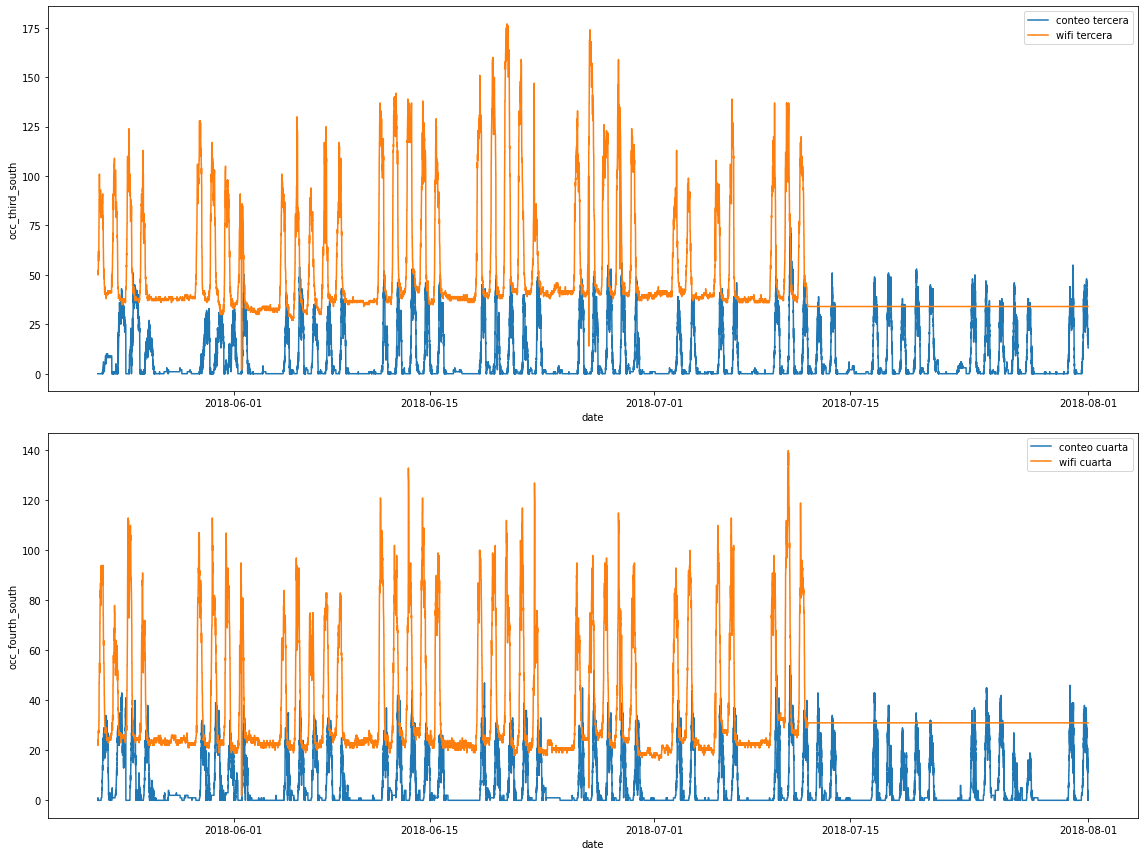

In [52]:
# Estudiamos las tendencias entre Mayo y Junio del 2018 
datos = occupation[(occupation['date']>'2018-05-01')&(occupation['date']<'2018-08-01')]
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(16,12) )
variables = ['occ_third_south' ,'occ_fourth_south', 'wifi_third_south','wifi_fourth_south']
labels=['conteo tercera', 'conteo cuarta', 'wifi tercera', 'wifi cuarta']
for i in range(4):
    sns.lineplot(x ='date', y=variables[i],data =datos , palette='rocket', ax=axes[i%2], label =labels[i])
    
    
    

plt.tight_layout()
plt.show()


Estos datos son un poco difíciles de tratar, porque no tenemos datos suficientes, de todas formas, visualizamos también el año 2020 (es en el que más datos tenemos, aunque sea solo de conteo de conexiones wifi).

In [100]:
filtro_2020 = occupation[(occupation['date']>'2020-02-10')&(occupation['date']<='2021-01-01')]
filtro_2020

,date,occ_third_south,occ_fourth_south,wifi_first_south,wifi_second_south,wifi_third_south,wifi_fourth_south,first_second_available
396193,2020-02-10 16:25:00,0.0,0.0,2.000000,19.0,127.000000,118.0,0.0
396194,2020-02-10 16:30:00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
396195,2020-02-10 16:35:00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
396196,2020-02-10 16:40:00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
396197,2020-02-10 16:45:00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
489891,2020-12-31 23:35:00,0.0,0.0,0.114775,1.0,7.313070,1.0,0.0
489892,2020-12-31 23:40:00,0.0,0.0,-0.058610,1.0,7.777221,1.0,0.0
489893,2020-12-31 23:45:00,0.0,0.0,0.026450,1.0,7.362605,1.0,0.0
489894,2020-12-31 23:50:00,0.0,0.0,0.050784,1.0,7.307667,1.0,0.0


In [101]:
filtro_2020['fecha_2']= pd.to_datetime(filtro_2020['date'].apply(lambda x:x.strftime("%Y-%m %H:%M:%S")))
filtro_2020.groupby('fecha_2').mean().reset_index()

/var/folders/bj/wg2_mprn1fl8bf0h7tq_sh2c0000gn/T/ipykernel_20801/1423192319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_2020['fecha_2']= pd.to_datetime(filtro_2020['date'].apply(lambda x:x.strftime("%Y-%m %H:%M:%S")))


,fecha_2,occ_third_south,occ_fourth_south,wifi_first_south,wifi_second_south,wifi_third_south,wifi_fourth_south,first_second_available
0,2020-02-01 00:00:00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,2020-02-01 00:05:00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,2020-02-01 00:10:00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,2020-02-01 00:15:00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,2020-02-01 00:20:00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
3163,2020-12-01 23:35:00,0.0,0.0,0.552090,5.193548,17.493970,7.774194,0.0
3164,2020-12-01 23:40:00,0.0,0.0,0.546496,5.129032,17.444426,7.806452,0.0
3165,2020-12-01 23:45:00,0.0,0.0,0.549240,5.161290,17.495568,7.612903,0.0
3166,2020-12-01 23:50:00,0.0,0.0,0.550025,5.548387,17.558312,7.741935,0.0


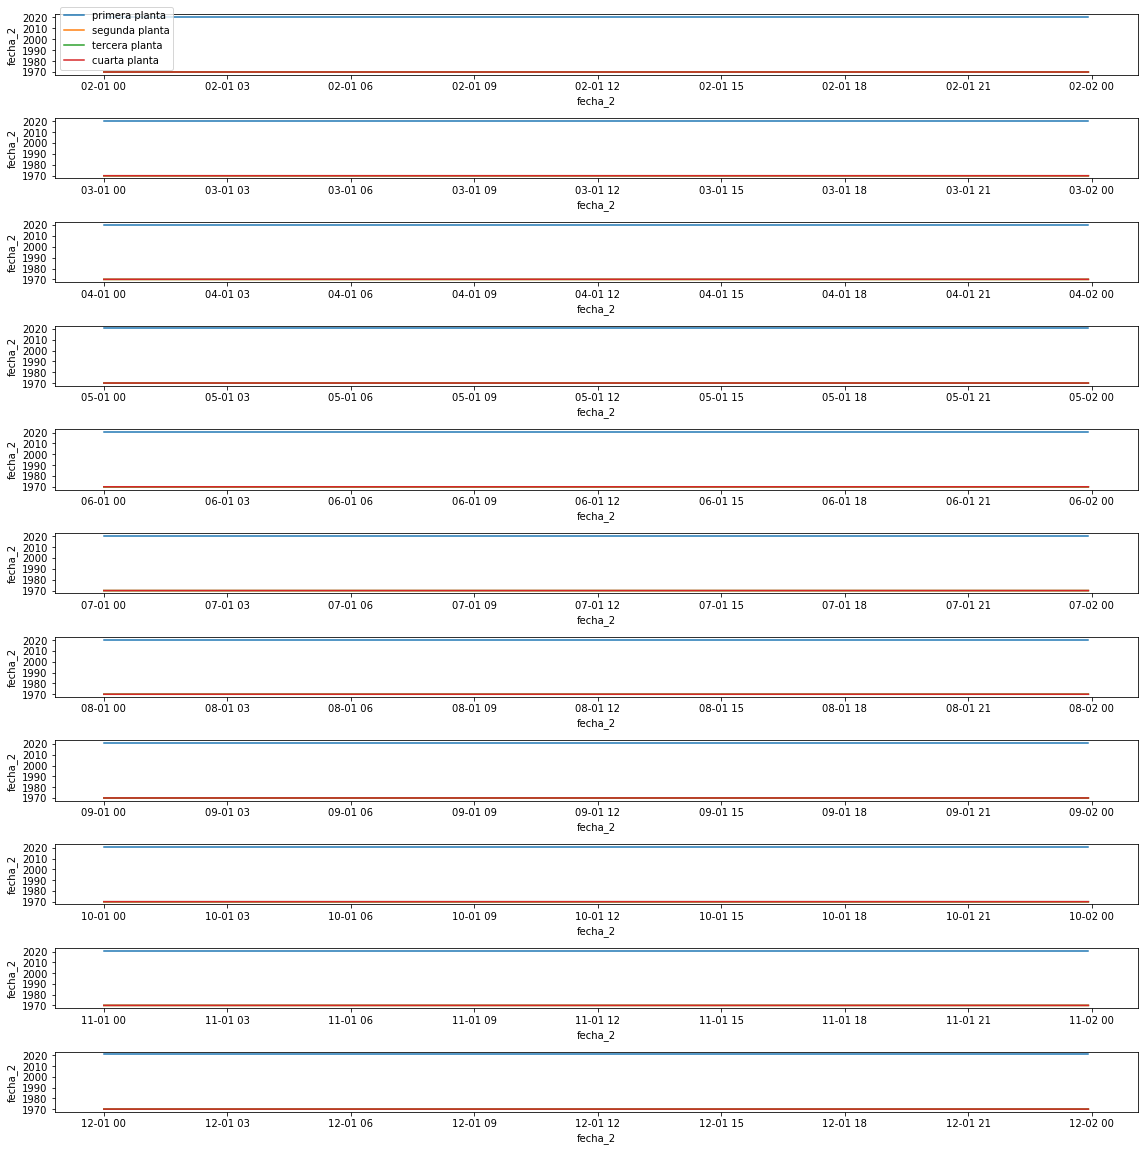

In [113]:
#Visualización por meses (Febrero-Diciembre) de las tendencias en el conteo wifi a lo largo de un día (media de los timestamps de todo el mes)

# Estudiamos las tendencias entre Mayo y Junio del 2018 
datos2020wifi = filtro_2020.groupby('fecha_2').mean().reset_index()[['fecha_2', 'wifi_first_south','wifi_second_south','wifi_third_south','wifi_fourth_south']]
fig, axes = plt.subplots(nrows=11,ncols=1, figsize=(16,16) )
variables = datos2020wifi.columns.values
labels=['primera planta', 'segunda planta', 'tercera planta', 'cuarta planta']
for i in range(11):
    datos_mes = datos2020wifi[datos2020wifi['fecha_2'].dt.month == i+2]
    for j in range(4):
        sns.lineplot(x ='fecha_2', y=variables[j],data =datos_mes , palette='rocket', ax=axes[i], label =labels[j])
    if i!=0:
        axes[i].get_legend().remove()
    
    

plt.tight_layout()
plt.show()



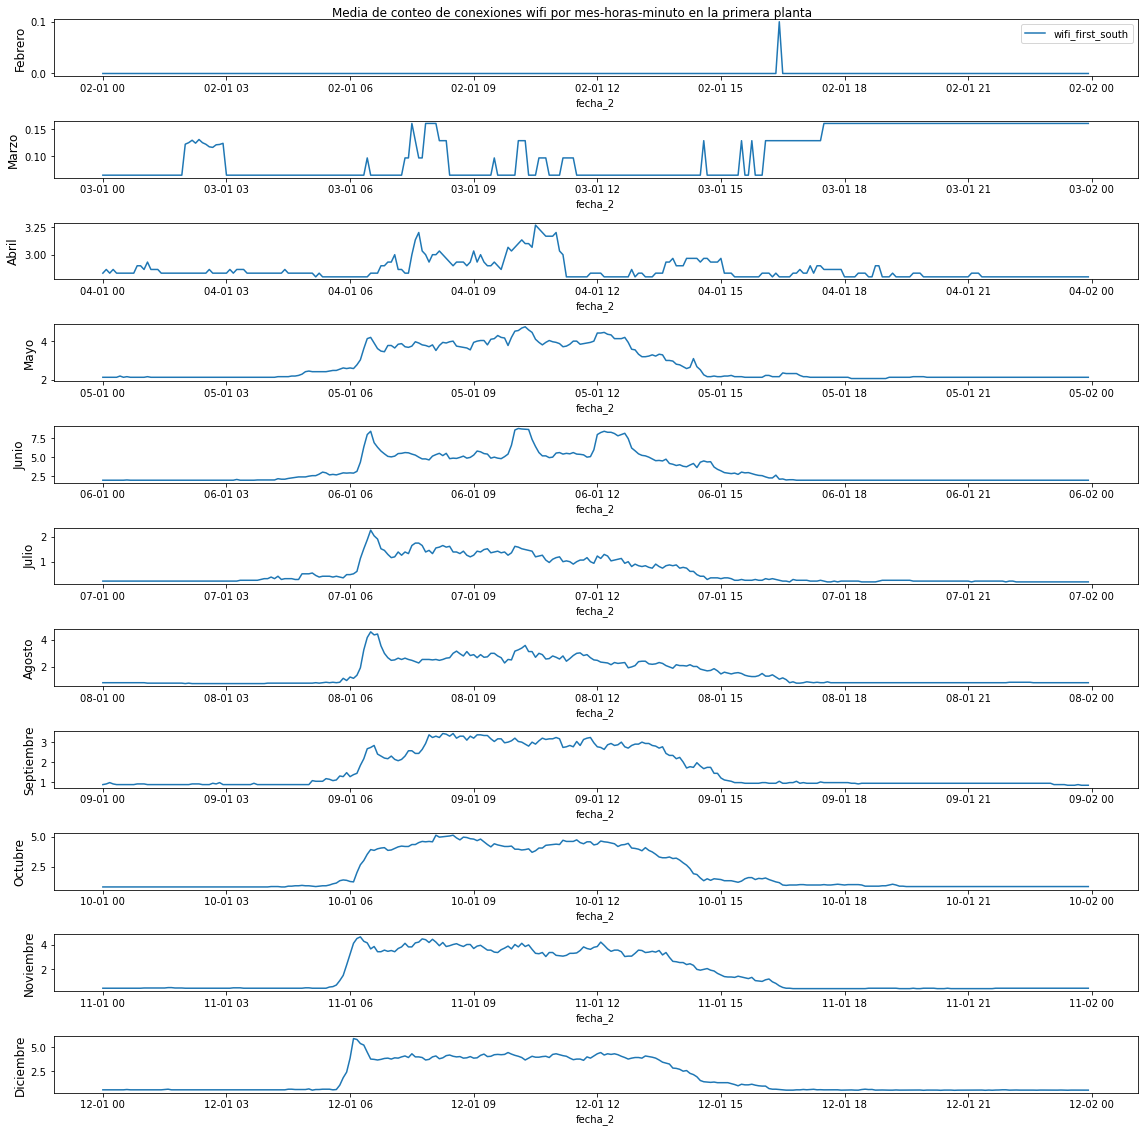

In [120]:
#No vemos la variación, parece que es constante, nos fijamos solamente en una de las cuatro variables
datos2020wifi = filtro_2020.groupby('fecha_2').mean().reset_index()[['fecha_2', 'wifi_first_south']]
fig, axes = plt.subplots(nrows=11,ncols=1, figsize=(16,16) )
variables = datos2020wifi.columns.values
labels=['primera planta', 'segunda planta', 'tercera planta', 'cuarta planta']
months3=['Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
for i in range(11):
    datos_mes = datos2020wifi[datos2020wifi['fecha_2'].dt.month == i+2]
    
    sns.lineplot(x ='fecha_2', y='wifi_first_south',data =datos_mes , palette='rocket', ax=axes[i], label ='wifi_first_south')
    if i!=0:
        axes[i].get_legend().remove()
    axes[i].set_ylabel(months3[i], rotation=90, size='large')
    
fig.suptitle("Media de conteo de conexiones wifi por mes-horas-minuto en la primera planta")     


plt.tight_layout()
plt.show()




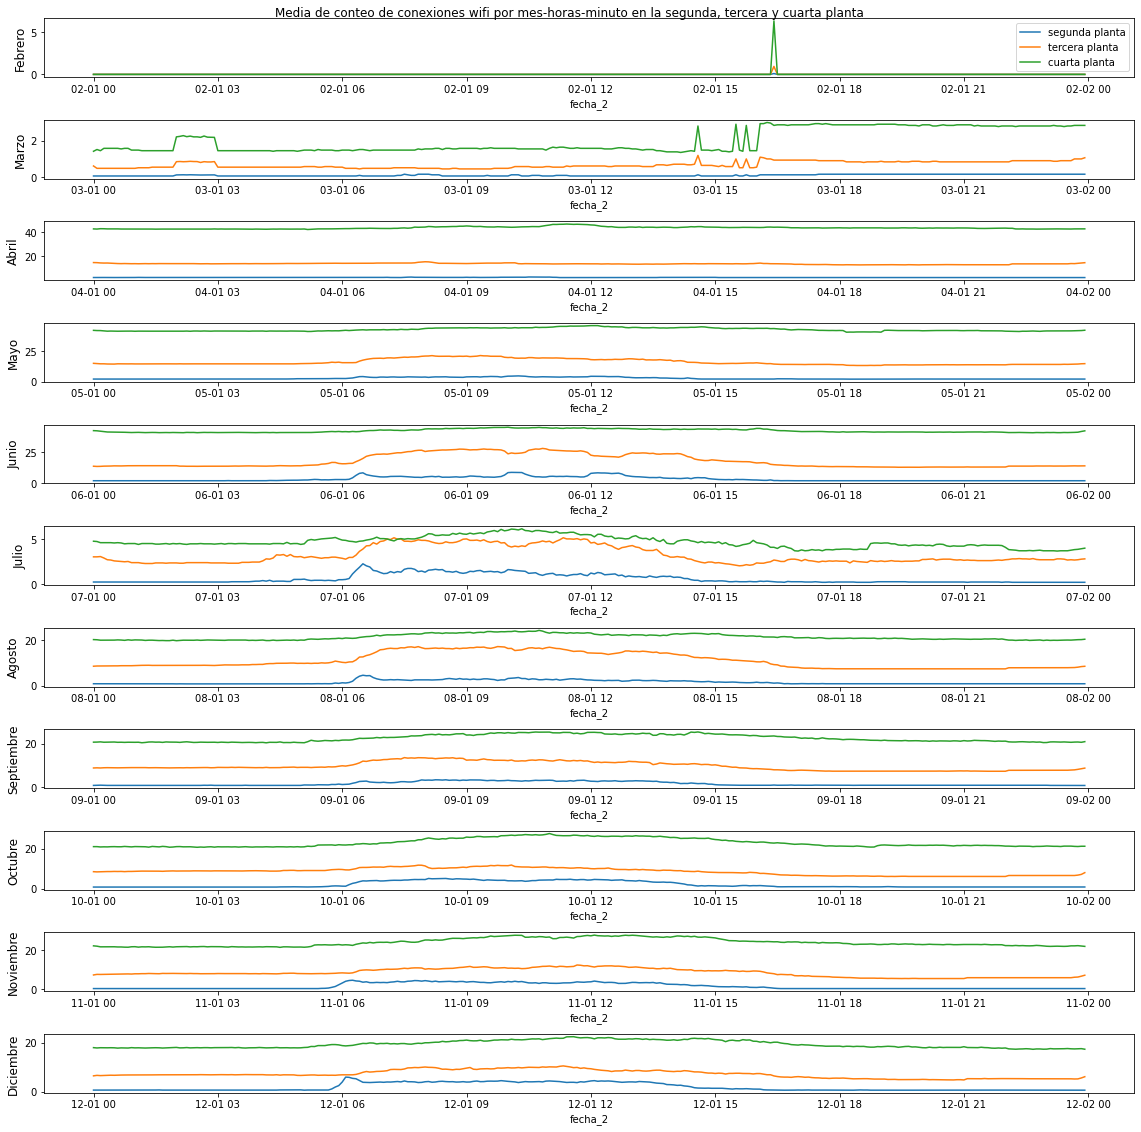

In [121]:
#Visualización por meses (Febrero-Diciembre) de las tendencias en el conteo wifi a lo largo de un día (media de los timestamps de todo el mes)

# Estudiamos las tendencias entre Mayo y Junio del 2018 
datos2020wifi = filtro_2020.groupby('fecha_2').mean().reset_index()[['fecha_2', 'wifi_first_south','wifi_second_south','wifi_third_south','wifi_fourth_south']]
fig, axes = plt.subplots(nrows=11,ncols=1, figsize=(16,16) )
variables = datos2020wifi.columns.values
labels=['primera planta', 'segunda planta', 'tercera planta', 'cuarta planta']
months3=['Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']


for i in range(11):
    datos_mes = datos2020wifi[datos2020wifi['fecha_2'].dt.month == i+2]
    for j in range(3):
        sns.lineplot(x ='fecha_2', y=variables[j+1],data =datos_mes , palette='rocket', ax=axes[i], label =labels[j+1])
    if i!=0:
        axes[i].get_legend().remove()
    axes[i].set_ylabel(months3[i], rotation=90, size='large')


    
fig.suptitle("Media de conteo de conexiones wifi por mes-horas-minuto en la segunda, tercera y cuarta planta")     


plt.tight_layout()
plt.show()




## Indoor environmental data

En este bloque de datos tenemos distintos ficheros csv, cada uno con un periodo de tiempo determinado. Comenzaremos estudiando los correspondientes a las temperaturas de termostato de la calefacción y el aire acondicionado (heating and cooling setpoint temperature), y cubren desde Septiembre del 2018 hasta Diciembre del 2020.

## Prueba 1: Fusión de los datos 



In [190]:
joined = outdoor_w.merge(energy_use, how='outer', left_on = 'date', right_on ='date')

In [191]:
joined.sort_values(by='date')

,date,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1,mels_S,lig_S,mels_N,hvac_N,hvac_S
0,2018-01-01 00:00:00,11.640,11.510,8.10,79.07,86.70,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:15:00,11.490,11.420,8.14,80.10,45.88,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:30:00,11.590,11.510,8.21,79.92,51.62,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:45:00,11.440,11.410,8.11,80.20,21.43,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:00,11.120,11.150,8.04,81.50,6.45,1.200000,0.200000,7.500000,37.400002,19.500000
...,...,...,...,...,...,...,...,...,...,...,...
105212,2020-12-31 23:00:00,15.250,13.378,4.56,49.13,267.90,0.071429,0.100000,1.177354,7.600000,27.652381
105213,2020-12-31 23:15:00,15.250,13.639,4.20,47.89,254.20,0.078571,0.100000,1.140462,7.461538,27.735000
105214,2020-12-31 23:30:00,14.494,13.372,4.12,50.00,199.90,0.093333,0.557143,1.792833,7.526000,27.022222
105215,2020-12-31 23:45:00,13.994,13.528,4.11,51.61,188.80,0.092308,0.680000,1.930493,7.851538,27.833333
